# (Investegating Ford GoBike data system 2017-2018-2019)
## by (Kholod Alhasani)

## Investigation Overview

> 
Here we aim to find trend and pattren of different user types behaviour when using Ford GoBike in terms of trip duration, used station, trip counts per day/ months in the years 2017, 2018 and 2019. The folowing was investegated and visualiesd:
- number of users type(subscribers vs Customer)
- Trip duration vs user type
- User type numbers per weekday
- Trip duration spent by user type per stations



## Dataset Overview

> In this analysis three datasets were used to investigate Ford GoBike system taken from (https://s3.amazonaws.com/baywheels-data/index.html) for the years 2017, 2018 and 2019. the features used in this analysis were the ones in common between the three datasets 13 features in common. These datasets contains data about the users type how use this services, number of the trips, distant of the trips, duration and used stations. 



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_17=pd.read_csv('/Users/mamaal3sl/Downloads/Project Template/df_17_clean.csv')
df_18=pd.read_csv('/Users/mamaal3sl/Downloads/Project Template/df_18_clean.csv')
df_19=pd.read_csv('/Users/mamaal3sl/Downloads/Project Template/df_19_clean.csv')

In [3]:
df_18.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,start_day,duration_min
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,2,Wednesday,9.966667
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,2,Wednesday,15.716667


## Number of users type (subscribers vs Customer)

> In these pie charts, we can see that the subscriber users are always in higher percentages than customers how do not have a membership in Ford GoBike. a large percentage ranging from 79 to 85% of users in the three years are users with membership.

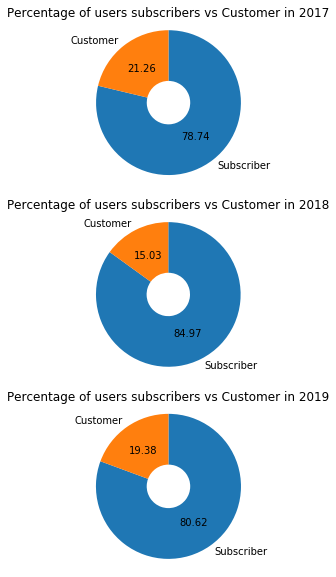

In [4]:
plt.figure(figsize = [10, 10])

plt.subplot(3,1,1)
user_type_17 = df_17['user_type'].value_counts()
plt.pie(user_type_17, labels = user_type_17.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.7}, autopct='%.2f');
plt.axis('square')
plt.title('Percentage of users subscribers vs Customer in 2017');

plt.subplot(3,1,2)
user_type_18 = df_18['user_type'].value_counts()
plt.pie(user_type_18, labels = user_type_18.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.7}, autopct='%.2f');
plt.axis('square')
plt.title('Percentage of users subscribers vs Customer in 2018');

plt.subplot(3,1,3)
user_type_19 = df_19['user_type'].value_counts()
plt.pie(user_type_19, labels = user_type_19.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.7}, autopct='%.2f');
plt.axis('square')
plt.title('Percentage of users subscribers vs Customer in 2019');


## (Average trip duration per user type)

> Trip duration for each type of users (Subscriber vs Customer). in the years 17,18 and 19 have almost the same trend or destribution wheres the customurs tend to have longer bike trips than the subscriber how tend to use bikes for less time 11 min while 22-42 min for the Customers. 

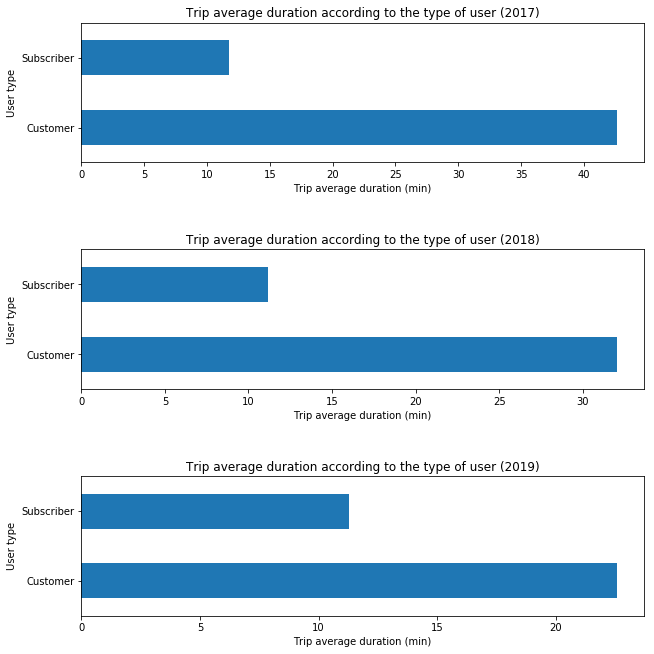

In [5]:
duration_type_17=df_17.groupby('user_type')['duration_min'].mean()
duration_type_18=df_18.groupby('user_type')['duration_min'].mean()
duration_type_19=df_19.groupby('user_type')['duration_min'].mean()

plt.figure(figsize = [10, 10]) 


plt.subplot(3,1,1)
duration_type_17.plot.barh(x='user_type', y='duration_min')
plt.xlabel('Trip average duration (min)')
plt.ylabel('User type')
plt.title('Trip average duration according to the type of user (2017)')

plt.subplot(3,1,2)
duration_type_18.plot.barh(x='user_type', y='duration_min')
plt.xlabel('Trip average duration (min)')
plt.ylabel('User type')
plt.title('Trip average duration according to the type of user (2018)')

plt.subplot(3,1,3) 
duration_type_19.plot.barh(x='user_type', y='duration_min')
plt.xlabel('Trip average duration (min)')
plt.ylabel('User type')
plt.title('Trip average duration according to the type of user (2019)')
plt.tight_layout(pad=4.0)

## (Daily number of trips per user type)

This line plot represent the daily number of trips for each user type. the subscriber curve shows steep decrease in trips counts in weekend days, while the customer curve showes steady curve with slight increase in weekend( Saturday, Sunday). this appears more in the years 17/18.

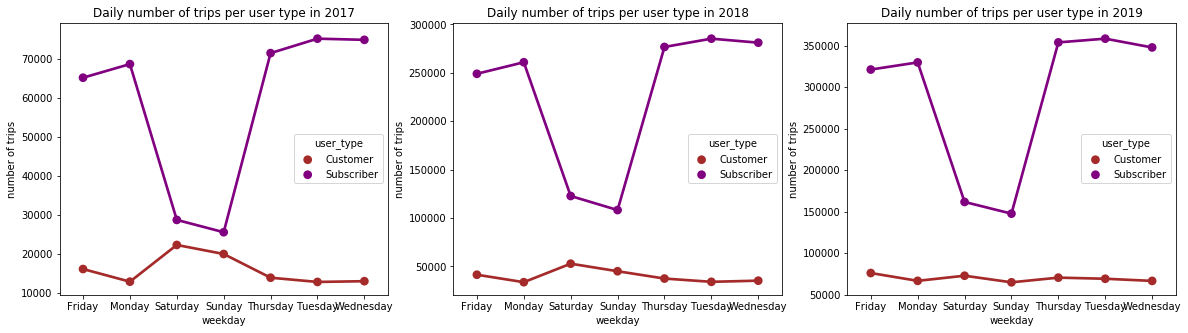

In [6]:
type_per_day_17=df_17.groupby(["start_day","user_type"]).size().reset_index()
type_per_day_18=df_18.groupby(["start_day","user_type"]).size().reset_index()
type_per_day_19=df_19.groupby(["start_day","user_type"]).size().reset_index()

plt.figure(figsize = [20, 5]) 
colors = {'Subscriber':'purple', 'Customer':'brown'}

plt.subplot(1,3,1)
sb.pointplot(x='start_day', y=0, hue='user_type', scale=.99, palette=colors, data=type_per_day_17)
plt.ylabel('number of trips')
plt.xlabel('weekday')
plt.title('Daily number of trips per user type in 2017')

plt.subplot(1,3,2)
sb.pointplot(x='start_day', y=0, hue='user_type', scale=.99, palette=colors, data=type_per_day_18)
plt.ylabel('number of trips')
plt.xlabel('weekday')
plt.title('Daily number of trips per user type in 2018')

plt.subplot(1,3,3)
sb.pointplot(x='start_day', y=0, hue='user_type', scale=.99, palette=colors, data=type_per_day_19)
plt.ylabel('number of trips')
plt.xlabel('weekday')
plt.title('Daily number of trips per user type in 2019');

## Trip duration spent by user type per stations
The relationship between trip duration and station for both user types. In subscribers, trip duration is not affected by different stations they use the stations in the same proportion. While customers trip duration have variation depending on the station. customers spend longer time in their trips when using San Francisco Ferry Building (Harry Bridges Plaza) interstingly in all years. This could be due to either the location of the station ( the centre of the city for example) or it has longer working hours. 

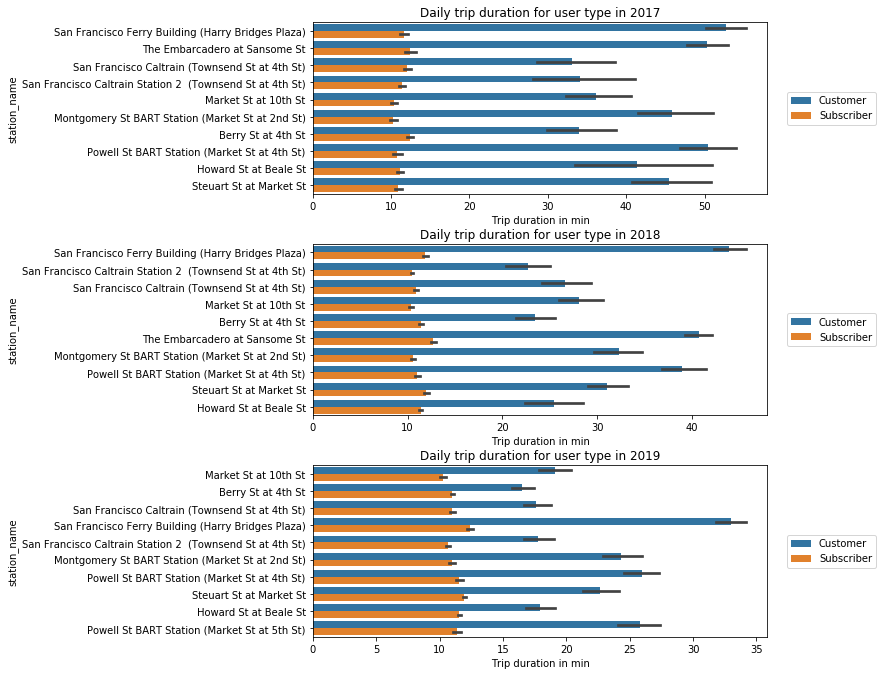

In [ ]:
top_10_station_17=df_17['start_station_name'].value_counts()[:10]
top_10_station_18=(df_18['start_station_name'].value_counts())[:10]
top_10_station_19=(df_19['start_station_name'].value_counts())[:10]


plt.figure(figsize = [10.69, 9.27]) 


plt.subplot(3,1,1)
station_order=top_10_station_17.index
sb.barplot(data = df_17, y = 'start_station_name', x = 'duration_min', hue = 'user_type',hue_order=['Customer','Subscriber'], order=station_order)
plt.ylabel('station_name')
plt.xlabel('Trip duration in min')
plt.title('Daily trip duration for user type in 2017')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.subplot(3,1,2)
station_order=top_10_station_18.index
sb.barplot(data = df_18, y = 'start_station_name', x = 'duration_min', hue = 'user_type', hue_order=['Customer','Subscriber'], order=station_order)
plt.ylabel('station_name')
plt.xlabel('Trip duration in min')
plt.title('Daily trip duration for user type in 2018')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

station_order=top_10_station_19.index
plt.subplot(3,1,3)
sb.barplot(data = df_19, y = 'start_station_name', x = 'duration_min', hue = 'user_type', hue_order=['Customer','Subscriber'], order=station_order)
plt.ylabel('station_name')
plt.xlabel('Trip duration in min')
plt.title('Daily trip duration for user type in 2019')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.tight_layout(pad=0.3);

In [ ]:
!jupyter nbconvert slide_deck_kholod.ipynb --to slides --post serve --template output_toggle.tpl

[NbConvertApp] Converting notebook slide_deck_kholod.ipynb to slides
[NbConvertApp] Writing 551370 bytes to slide_deck_kholod.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_kholod.slides.html
Use Control-C to stop this server
